In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                   test_size=.2, random_state=42)

In [2]:
# sgd classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [3]:
# support vector marchine
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9385964912280702

In [4]:
x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=.2, random_state=42)

In [18]:
print('X >> {} / {}'.format(x.shape[0], len(x)/x.shape[0]*100))
print('X_train >> {} / {}'.format(x_train.shape[0], len(x_train)/x.shape[0]*100))
print('X_train_val >> {} / {}'.format(x_train_val.shape[0], len(x_train_val)/x.shape[0]*100))
print('X_val >> {} / {}'.format(x_val.shape[0], len(x_val)/x.shape[0]*100))
print('X_test >> {} / {}'.format(x_test.shape[0], len(x_test)/x.shape[0]*100))

X >> 569 / 100.0
X_train >> 455 / 79.96485061511423
X_train_val >> 364 / 63.971880492091394
X_val >> 91 / 15.992970123022848
X_test >> 114 / 20.035149384885763


In [21]:
# validation use
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_val, y_train_val)
sgd.score(x_val,y_val)

0.6923076923076923

In [22]:
sgd.score(x_test, y_test)

0.6929824561403509

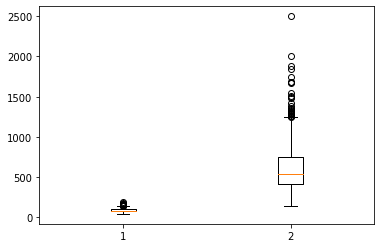

x >>  ['mean perimeter' 'mean area']


In [26]:
# data preprocessing
# why we have to use scaler

%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(x_train_val[:,2:4])
plt.show()
print('x >> ',cancer.feature_names[[2,3]])

In [30]:
import numpy as np
np.random.seed(42)
class SingleLayer:
    def __init__(self, lr=.1):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = lr
        
    def forward(self, x):
        return np.sum(self.w*x) + self.b
    
    def backward(self, x, err):
        return x*err, err
    
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)),x]
    
    def fit(self, x, y, epochs=100):
        self.w = np.random.rand(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forward(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backward(x[i], err)
                self.w -= self.lr*w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            
    def predict(self, x):
        z = [self.forward(x_i) for x_i in x]
        return (np.array(z) > 0).astype(int)
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

In [32]:
layer1 = SingleLayer()
layer1.fit(x_train_val, y_train_val)
layer1.score(x_val, y_val)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


0.9120879120879121

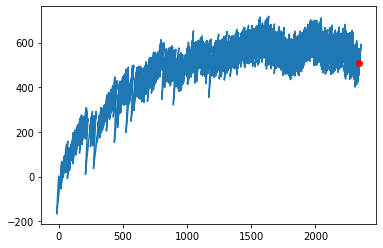

In [33]:
w2 = []; w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.show()

In [34]:
train_mean = np.mean(x_train_val, axis=0)
train_std = np.std(x_train_val, axis=0)
x_train_scaled = (x_train_val - train_mean) / train_std

In [36]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train_val)
x_val_scaled = (x_val - train_mean) / train_std
layer2.score(x_val, y_val)

0.37362637362637363

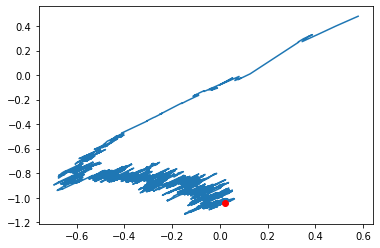

In [37]:
w2 = []; w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.show()

In [38]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled_in_book = (x_val - val_mean) / val_std
layer2.score(x_val_scaled_in_book, y_val)

0.967032967032967

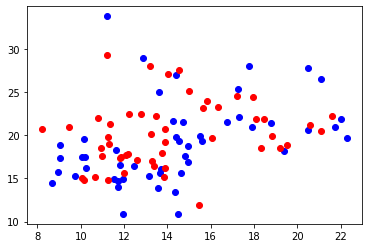

In [39]:
# train validation data compare

plt.plot(x_train_val[:50, 0], x_train_val[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50,1], 'ro')
plt.show()

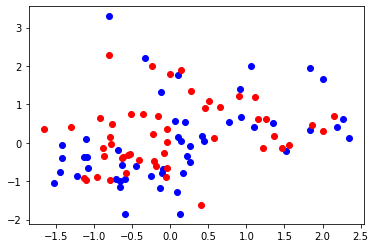

In [41]:
# train validation data compare

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50,1], 'ro')
plt.show()

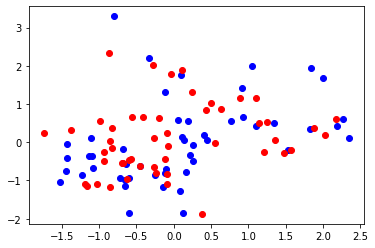

In [42]:
# train validation data compare

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled_in_book[:50, 0], x_val_scaled_in_book[:50,1], 'ro')
plt.show()

In [43]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

In [48]:
import numpy as np
np.random.seed(42)
class SingleLayer_with_validation:
    def __init__(self, lr=.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses=[]
        self.w_history = []
        self.lr = lr
        
    def forward(self, x):
        return np.sum(self.w*x) + self.b
    
    def backward(self, x, err):
        return x*err, err
    
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)),x]
    
    def fit(self, x, y, epochs=100, x_val= None, y_val=None):
        self.w = np.random.rand(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forward(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backward(x[i], err)
                self.w -= self.lr*w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            self.update_val_losses(x_val, y_val)
            
    def predict(self, x):
        z = [self.forward(x_i) for x_i in x]
        return (np.array(z) > 0).astype(int)
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)
    
    def update_val_losses(self, x_val, y_val):
        if x_val is None or y_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forward(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))

In [49]:
layer3 = SingleLayer_with_validation()
layer3.fit(x_train_scaled, y_train_val, x_val=x_val_scaled, y_val=y_val)

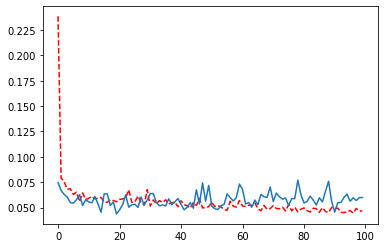

In [52]:
plt.plot(layer3.losses,'r--')
plt.plot(layer3.val_losses)

In [53]:
layer4 = SingleLayer_with_validation()
layer4.fit(x_train_scaled, y_train_val, epochs=20)

In [54]:
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [55]:
layer3.score(x_val_scaled, y_val)

0.967032967032967

In [59]:
x_ = np.arange(-10,10, 0.001)

In [60]:
y_=np.sign(x_)

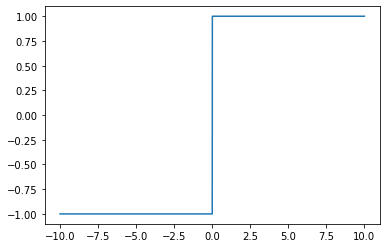

In [61]:
plt.plot(x_,y_)

In [78]:
import numpy as np
np.random.seed(42)
class SingleLayer_with_regulation:
    def __init__(self, lr=.1, l1=0, l2=0):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses=[]
        self.w_history = []
        self.lr = lr
        self.l1 = l1
        self.l2 = l2
        
    def forward(self, x):
        return np.sum(self.w*x) + self.b
    
    def backward(self, x, err):
        return x*err, err
    
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)),x]
    
    def fit(self, x, y, epochs=100, x_val= None, y_val=None):
        self.w = np.random.rand(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forward(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backward(x[i], err)
                w_grad += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.lr*w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y) + self.reg_loss())
            self.update_val_losses(x_val, y_val)
            
    def predict(self, x):
        z = [self.forward(x_i) for x_i in x]
        return (np.array(z) > 0).astype(int)
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)
    
    def update_val_losses(self, x_val, y_val):
        if x_val is None or y_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forward(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())
        
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + self.l2/2*np.sum(self.w**2)

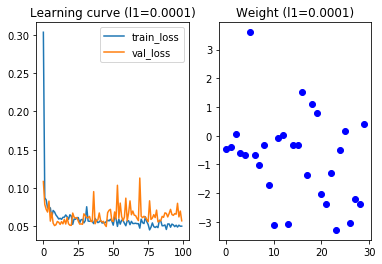

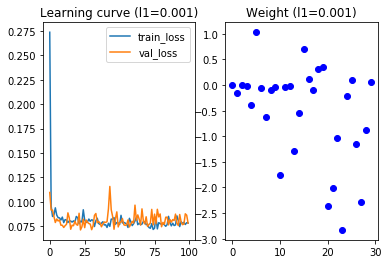

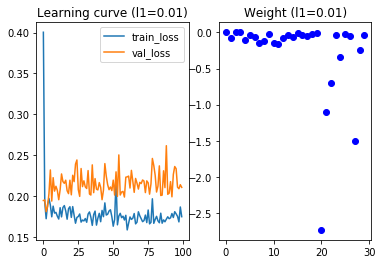

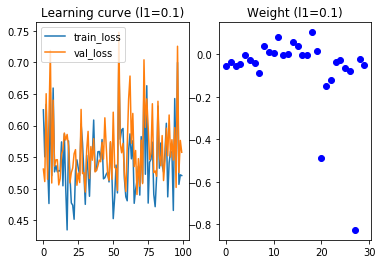

In [71]:
l1_ls = [.0001, .001, .01, .1]

for l1 in l1_ls:
    lyr = SingleLayer_with_regulation(l1=l1)
    lyr.fit(x_train_scaled, y_train_val, x_val=x_val_scaled, y_val=y_val)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].plot(lyr.losses, label='train_loss')
    ax[0].plot(lyr.val_losses, label='val_loss')
    ax[0].title.set_text('Learning curve (l1={})'.format(l1))
    ax[0].legend()
    ax[1].plot(lyr.w, 'bo')
    ax[1].title.set_text('Weight (l1={})'.format(l1))
    plt.show()
    
    
    

In [64]:
layer5 = SingleLayer_with_regulation(l1=.001)
layer5.fit(x_train_scaled, y_train_val, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

In [65]:
layer6 = SingleLayer_with_regulation(l1=.0001)
layer6.fit(x_train_scaled, y_train_val, epochs=20)
layer6.score(x_val_scaled, y_val)

0.978021978021978

<Figure size 1440x432 with 0 Axes>

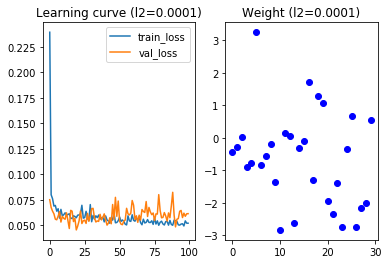

<Figure size 1440x432 with 0 Axes>

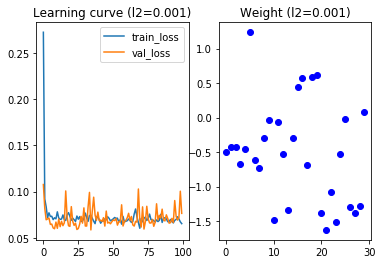

<Figure size 1440x432 with 0 Axes>

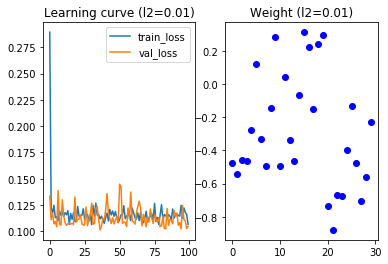

<Figure size 1440x432 with 0 Axes>

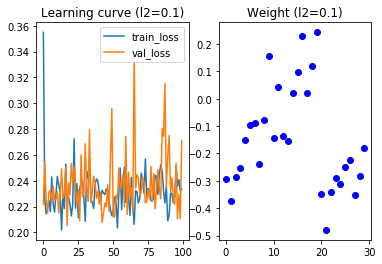

In [76]:
l2_ls = [.0001, .001, .01, .1]

for l2 in l2_ls:
    plt.figure(figsize=(20,6))
    lyr = SingleLayer_with_regulation(l2=l2)
    lyr.fit(x_train_scaled, y_train_val, x_val=x_val_scaled, y_val=y_val)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].plot(lyr.losses, label='train_loss')
    ax[0].plot(lyr.val_losses, label='val_loss')
    ax[0].title.set_text('Learning curve (l2={})'.format(l2))
    ax[0].legend()
    ax[1].plot(lyr.w, 'bo')
    ax[1].title.set_text('Weight (l2={})'.format(l2))
    plt.show()
    
    
    

In [79]:
layer7 = SingleLayer_with_regulation(l2=.01)
layer7.fit(x_train_scaled, y_train_val, epochs=50)
layer7.score(x_val_scaled, y_val)

0.978021978021978

In [81]:
np.sum(layer6.predict(x_val_scaled)==y_val)

89

In [83]:
# regulation in SGDClassifier in sklearn
sgd= SGDClassifier(loss='log', penalty='l2', alpha=.001, random_state=42)
sgd.fit(x_train_scaled, y_train_val)
sgd.score(x_val_scaled, y_val)

0.978021978021978

In [85]:
# k-fold cross validation
validation_scores = []


In [102]:
k = 10
bins = len(x_train)//k

In [103]:
for i in range(k):
    start =i*bins
    end = (i+1)*bins
    val_fold = x_train[start:end]
    val_target = y_train[start:end]
    
    train_idx = list(range(0,start)) + list(range(end,len(x_train_val)))
    train_fold = x_train[train_idx]
    train_target = y_train[train_idx]
    
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_sclaed = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer_with_regulation(l2=.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_sclaed, val_target)
    validation_scores.append(score)
    
np.mean(validation_scores)

0.9708333333333334

In [96]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log', penalty='l2', alpha=.001, random_state=42)
scores = cross_validate(sgd, x_train, y_train, cv=10)
np.mean(scores['test_score'])

0.850096618357488

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train, y_train, cv=10, return_train_score=True)
np.mean(scores['test_score'])

0.9694202898550724

In [98]:
np.mean(scores['train_score'])

0.9875478561631581

In [100]:
len(x_train)//k

45

In [101]:
len(x_train_val)//k

36